## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [6]:
train_data.tail()

,Date,count
573,2014-03-21,149
574,2014-03-22,129
575,2014-03-23,119
576,2014-03-24,214
577,2014-03-25,236


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


In [7]:
valid_data.tail()

,Date,count
179,2014-09-21,379
180,2014-09-22,588
181,2014-09-23,554
182,2014-09-24,702
183,2014-09-25,589


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [7]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

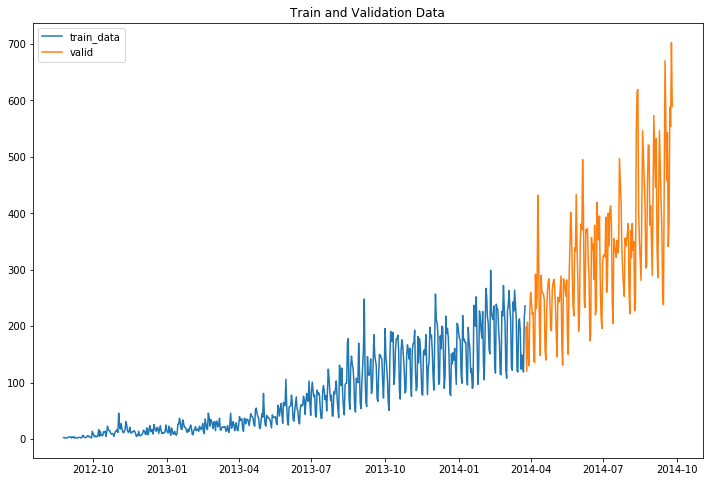

In [8]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

In [10]:
train_data.Date.min(), train_data.Date.max()

('2012-08-25', '2014-03-25')

In [11]:
valid_data.Date.min(), valid_data.Date.max()

('2014-03-26', '2014-09-25')

# Naive Model
Use the last (most recent) value of train as the predictions


<img src="naive formula.png" width=160 height=100 />

In [12]:
print(train_data.shape)
train_data.tail()

(578, 2)


,Date,count
Date,,
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [13]:
# indexing starts from 0
train_data['count'][577]

236

In [14]:
# Defining predictions for validation
valid_data['naive'] = train_data['count'][577]

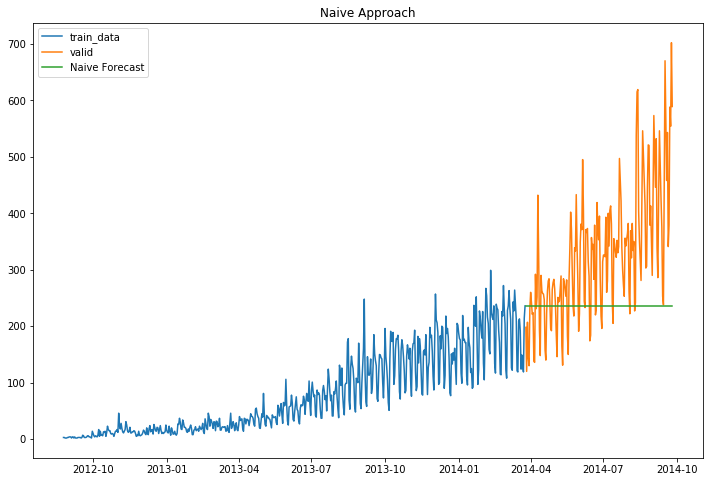

In [15]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [16]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 146.95130071764828
